In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('test_set_features.csv')
train = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')
combine = pd.concat([train, test], axis = 0)
ID = combine['respondent_id']
labels = labels.drop(['respondent_id'], axis = 1)
combine = combine.drop(['respondent_id'], axis = 1)
full_train = pd.concat([labels, train], axis = 1)

In [3]:
combine.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
combine_cols = combine.columns
labels_cols = labels.columns

In [5]:
#check column names
print(combine_cols)
print(labels_cols)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [6]:
#check the shape of the dataframes
print(train.shape)
print(test.shape)
print(labels.shape)
print(combine.shape)

(26707, 36)
(26708, 36)
(26707, 2)
(53415, 35)


In [7]:
#look at the response variables
labels.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [8]:
#26707 total rows
#21.2% got h1n1_vaccine
#46.6% got seasonal vaccine

In [8]:
combine.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,53238.000000,53177.000000,53265.000000,52994.000000,53377.000000,53333.000000,53256.000000,53251.000000,53159.000000,49095.000000,...,51822.000000,28913.000000,52626.000000,52647.000000,52645.000000,52501.000000,52402.000000,52357.000000,52941.000000,52941.000000
mean,1.620816,1.264287,0.049244,0.727705,0.069131,0.825849,0.355077,0.337271,0.680506,0.221489,...,0.111709,0.883824,3.847623,2.334701,2.359141,4.025409,2.713923,2.130756,0.890406,0.539166
std,0.906534,0.616881,0.216380,0.445145,0.253679,0.379243,0.478541,0.472783,0.466285,0.415253,...,0.315012,0.320442,1.007498,1.280608,1.361078,1.084875,1.380553,1.336077,0.753836,0.931626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
combine.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [10]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(40)

,Missing Ratio
employment_occupation,0.503529
employment_industry,0.498081
health_insurance,0.458710
income_poverty,0.166994
doctor_recc_seasonal,0.080876
doctor_recc_h1n1,0.080876
rent_or_own,0.076346
employment_status,0.054928
marital_status,0.053356
education,0.052682


In [11]:
#looks like employment occupation and employment industry is not code for not in work force where blank.
combine['employment_industry'] = combine['employment_industry'].fillna('abcde')
combine['employment_occupation'] = combine['employment_occupation'].fillna('fghij')

In [12]:
obj_cols = combine.select_dtypes(include = 'object').columns

In [13]:
obj_cols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
for c in obj_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combine[c].values)) 
    combine[c] = lbl.transform(list(combine[c].values))

# shape        
print('Shape all_data: {}'.format(combine.shape))

Shape all_data: (53415, 35)


In [15]:
combine.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2,1,0,1,8,2,0.0,0.0,0,6
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2,1,1,0,1,0,0.0,0.0,13,20
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,9,0,2.0,0.0,15,22
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2,1,1,1,5,1,0.0,0.0,0,6
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,19,5


In [16]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head(40)

,Missing Ratio
health_insurance,0.458710
doctor_recc_seasonal,0.080876
doctor_recc_h1n1,0.080876
chronic_med_condition,0.035627
child_under_6_months,0.030572
health_worker,0.029823
opinion_seas_sick_from_vacc,0.019807
opinion_seas_risk,0.018965
opinion_seas_vacc_effective,0.017111
opinion_h1n1_vacc_effective,0.014771


Text(0.5, 1.0, 'Percent missing data by feature')

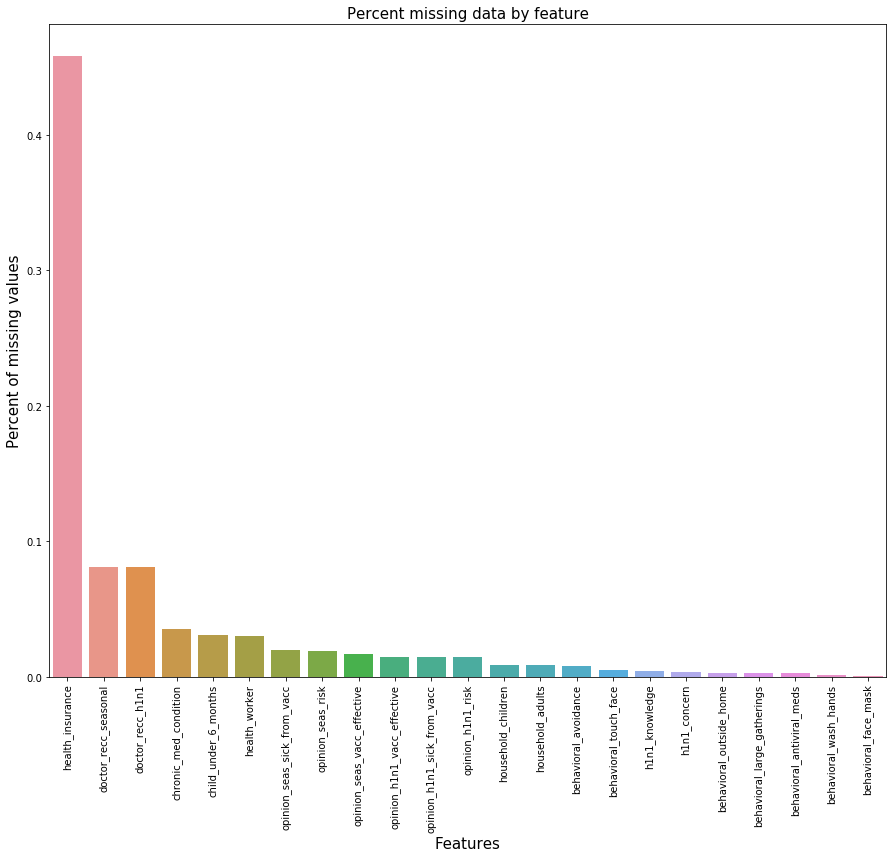

In [16]:
fig, ax = plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [17]:
#anything with under 2% missing, just input the mode
cols = ('opinion_seas_sick_from_vacc',
        'opinion_seas_risk',
        'opinion_seas_vacc_effective',
        'opinion_h1n1_vacc_effective',
        'opinion_h1n1_sick_from_vacc',
        'opinion_h1n1_risk',
        'household_adults',
        'household_children',
        'behavioral_avoidance',
        'behavioral_touch_face',
        'h1n1_knowledge',
        'h1n1_concern',
        'behavioral_outside_home',
        'behavioral_large_gatherings',
        'behavioral_antiviral_meds',
        'behavioral_wash_hands',
        'behavioral_face_mask')

for c in cols:
    combine[c] = combine[c].fillna(combine[c].mode()[0])
    

Text(0.5, 1.0, 'Percent missing data by feature')

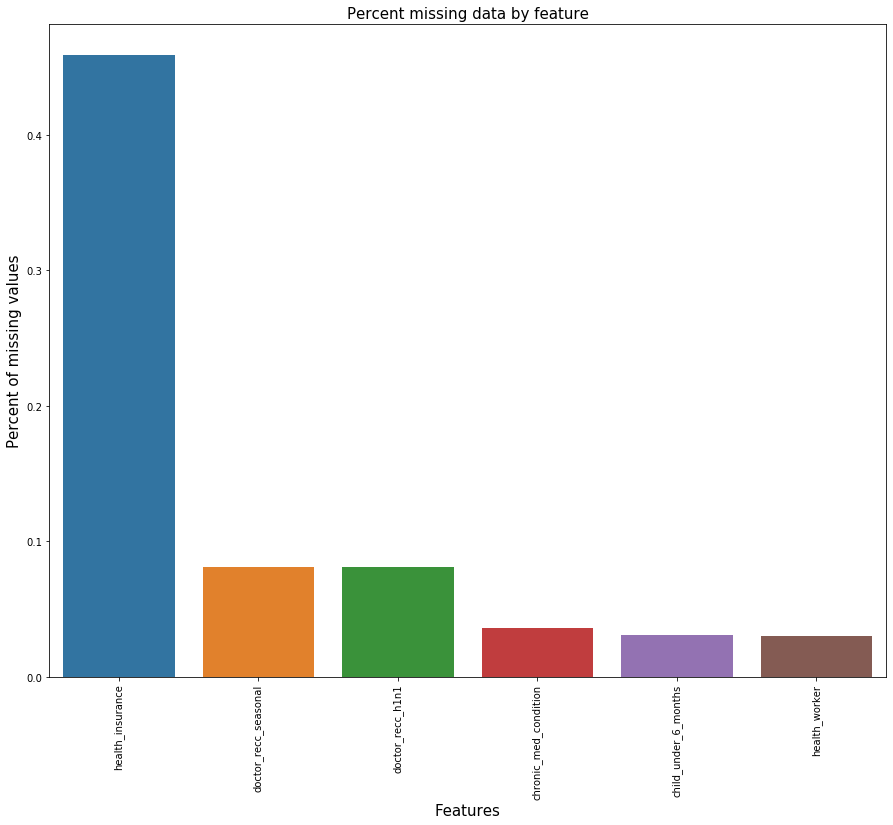

In [19]:
all_data_na = (combine.isnull().sum()/len(combine))
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]

fig, ax = plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

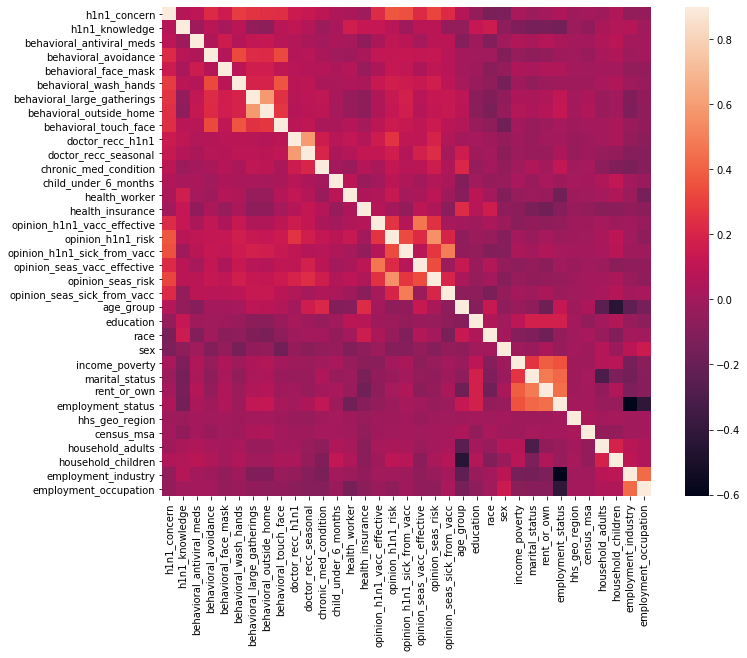

In [20]:
corrmat = combine.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [21]:
#impute the missing health_insurance values
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [22]:
#do logistic regression to fill values
log_data = combine.drop(['doctor_recc_seasonal', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months',
                        'health_worker'], axis = 1)

In [33]:
na_health = log_data[log_data['health_insurance'].isnull()]
log_data = log_data.dropna()

In [37]:
na_health = na_health.drop(['health_insurance'], axis = 1)

In [34]:
combine['health_insurance'].value_counts()

1.0    25554
0.0     3359
Name: health_insurance, dtype: int64

In [38]:
#pct with health_insurance
w_health = len(combine.health_insurance[combine.health_insurance==1])
wo_health = len(combine.health_insurance[combine.health_insurance==0])
pct_w = w_health / (w_health + wo_health)
print('percentage with health insurance: ', pct_w)

percentage with health insurance:  0.8838238854494518


In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.294113
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.181     
Dependent Variable:      health_insurance    AIC:                 17065.3642
Date:                    2021-02-19 21:42    BIC:                 17305.2536
No. Observations:        28913               Log-Likelihood:      -8503.7   
Df Model:                28                  LL-Null:             -10387.   
Df Residuals:            28884               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
h1n1_

In [50]:
X = X.drop(['behavioral_antiviral_meds', 'behavioral_touch_face', 'opinion_h1n1_risk', 'income_poverty', 
              'hhs_geo_region', 'household_children'], axis = 1)
na_health = na_health.drop(['behavioral_antiviral_meds', 'behavioral_touch_face', 'opinion_h1n1_risk', 'income_poverty', 
            'hhs_geo_region', 'household_children'], axis = 1)

In [42]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.294216
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.181     
Dependent Variable:      health_insurance    AIC:                 17059.3152
Date:                    2021-02-19 21:45    BIC:                 17249.5723
No. Observations:        28913               Log-Likelihood:      -8506.7   
Df Model:                22                  LL-Null:             -10387.   
Df Residuals:            28890               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
h1n1_

In [43]:
#build log model
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\ericp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [69]:
y_pred = pd.Series(logreg.predict(na_health))

In [68]:
ind = pd.Series(na_health.index)

In [77]:
pred_ind = pd.concat([ind, y_pred], axis = 1)